### 模拟掷骰子

In [1]:
import torch
from torch.distributions import multinomial

In [257]:
fair_probs = torch.ones(6)
multinomial.Multinomial(1 , fair_probs).sample() # 多项分布

tensor([0., 0., 1., 0., 0., 0.])

In [179]:
multinomial.Multinomial(10 , fair_probs).sample()

tensor([2., 1., 1., 2., 1., 3.])

In [187]:
counts = multinomial.Multinomial(1000,fair_probs).sample()
counts / 1000 , 1/6

(tensor([0.1610, 0.1480, 0.1730, 0.1820, 0.1590, 0.1770]), 0.16666666666666666)

In [258]:
counts = multinomial.Multinomial(1000,fair_probs).sample((5000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1 , keepdim = True)
estimates

tensor([[0.1630, 0.1600, 0.1420, 0.1830, 0.1780, 0.1740],
        [0.1620, 0.1625, 0.1610, 0.1765, 0.1685, 0.1695],
        [0.1597, 0.1693, 0.1653, 0.1750, 0.1687, 0.1620],
        ...,
        [0.1664, 0.1669, 0.1667, 0.1667, 0.1666, 0.1667],
        [0.1664, 0.1669, 0.1667, 0.1667, 0.1666, 0.1667],
        [0.1664, 0.1669, 0.1667, 0.1667, 0.1666, 0.1667]])

In [199]:
from matplotlib import pyplot as plt

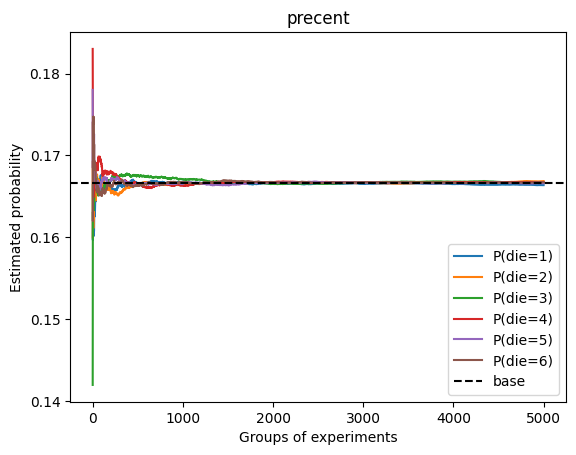

In [259]:
for i in range(6):
    plt.plot(estimates[:,i],label='P(die=' + str(i+1) + ')')
plt.axhline(y=0.1667,color = 'black',linestyle = 'dashed',label = 'base')
plt.legend()
plt.xlabel('Groups of experiments')
plt.ylabel('Estimated probability')
plt.title('precent')
plt.show()